In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import sys
import scipy as sp
import statsmodels as sm
import matplotlib.pyplot as plt
# import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

In [126]:
sales_df=pd.read_csv("sales_promo_data_19_20.csv", parse_dates=True)

In [127]:
sales_df.tail()

,Category,5-Jan-19,12-Jan-19,19-Jan-19,26-Jan-19,2-Feb-19,9-Feb-19,16-Feb-19,23-Feb-19,2-Mar-19,...,27-Jun-20,4-Jul-20,11-Jul-20,18-Jul-20,25-Jul-20,1-Aug-20,8-Aug-20,15-Aug-20,22-Aug-20,29-Aug-20
15,shaving_promo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,Sunscreen,1661749,1434750,1423463,1366366,1496036,1838132,2138131,2443552,2793423,...,10271589,11106721,9383774,8412377,7211073,6410886,5008472,5074913,4078391,3295517
17,sunscreen_promo,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,1,1,1
18,Tanner,84682,78632,81813,82477,89832,104680,109791,111713,125240,...,217349,226920,187838,175613,160136,152533,133586,130342,119494,111080
19,tanner_promo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
sales_df=sales_df.rename(columns={"Category":"Date"})

In [129]:
sales_df.index = pd.to_datetime(sales_df.index)

In [130]:
sales_df=sales_df.T

In [131]:
sales_df.columns= sales_df.iloc[0]

In [132]:
sales_df=sales_df.iloc[1:,:]
sales_df.head()

Date,Acne,acne_promo,Baby,baby_promo,Bath,bath_promo,Body Wash,body_promo,Hair,hair_promo,Lotion,lotion_promo,Makeup,makeup_promo,Shaving,shaving_promo,Sunscreen,sunscreen_promo,Tanner,tanner_promo
5-Jan-19,14969813,0,1417338,0,55558,0,1491216,0,929666,0,3227827,0,7156661,0,273010,0,1661749,0,84682,0
12-Jan-19,15488855,0,1515492,0,59528,0,1599429,0,1042393,0,3551875,0,7188663,0,283501,0,1434750,0,78632,0
19-Jan-19,15522357,0,1562793,0,56189,0,1409114,0,1048880,0,3435812,0,7173238,0,266646,0,1423463,0,81813,0
26-Jan-19,15054219,0,1555259,0,56073,0,1387046,0,1104388,0,3406859,0,6851425,0,264479,0,1366366,0,82477,0
2-Feb-19,14585357,0,1638797,0,60760,0,1479577,0,1235337,0,3754491,0,6745738,0,265783,0,1496036,0,89832,0


In [133]:
sales_df.index = pd.to_datetime(sales_df.index)

In [134]:
acne_df= sales_df[["Acne","acne_promo"]]
baby_df= sales_df[["Baby","baby_promo"]]
bath_df= sales_df[["Bath","bath_promo"]]
body_df= sales_df[["Body Wash","body_promo"]]
hair_df= sales_df[["Hair","hair_promo"]]
lotion_df= sales_df[["Lotion","lotion_promo"]]
makeup_df= sales_df[["Makeup","makeup_promo"]]
shaving_df= sales_df[["Shaving","shaving_promo"]]
sunscreen_df= sales_df[["Sunscreen","sunscreen_promo"]]
tanner_df= sales_df[["Tanner","tanner_promo"]]

In [135]:
acne_df.dtypes

Date
Acne          object
acne_promo    object
dtype: object

In [251]:
acne_df=acne_df.astype(int)
acne_df=acne_df.dropna()

In [252]:
makuep_df=makeup_df.astype(int)
makeup_df=makeup_df.dropna()

In [253]:
lotion_df=lotion_df.astype(int)
lotion_df=lotion_df.dropna()

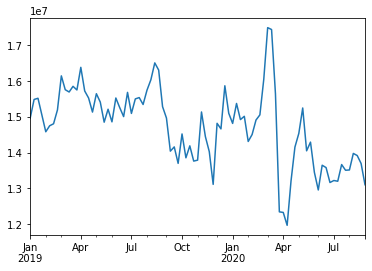

In [201]:
ax= acne_df["Acne"].plot()

In [204]:
df1 = acne_df["Acne"]
df2 = makuep_df["Makeup"]
df3 = lotion_df["Lotion"]

<AxesSubplot:>

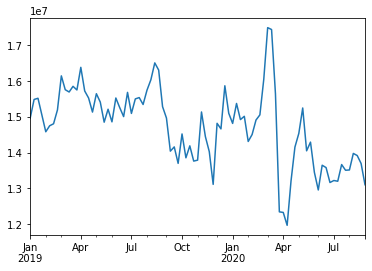

In [209]:
df1.plot()

<AxesSubplot:>

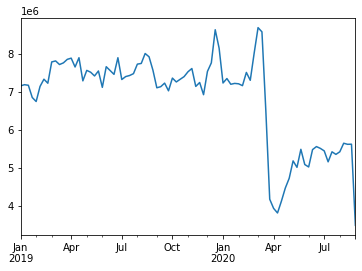

In [211]:
df2.plot()

<AxesSubplot:>

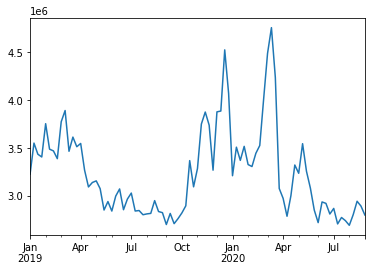

In [210]:
df3.plot()

In [ ]:
# In this example, we want to use regression analysis and detrmine if the week of the year can predict the sales

In [ ]:
## Acne

In [139]:
X = acne_df['Acne'].to_frame()

In [141]:
# Generate a column with the week of the year
X['Week_of_Year'] = X.index.weekofyear
X.head()


<ipython-input-141-0d8505e88685>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  X['Week_of_Year'] = X.index.weekofyear


,Acne,Week_of_Year
2019-01-05,14969813,1
2019-01-12,15488855,2
2019-01-19,15522357,3
2019-01-26,15054219,4
2019-02-02,14585357,5


In [142]:
acne_week=X.copy()

<AxesSubplot:xlabel='Week_of_Year', ylabel='Acne'>

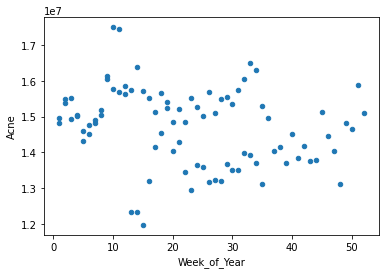

In [143]:
X.plot(x= "Week_of_Year", y="Acne", kind="scatter")

In [144]:
# Binary encode the weekly column to use as new input features for the model
X_binary_encoded = pd.get_dummies(X, columns=['Week_of_Year'])
X_binary_encoded.head()

,Acne,Week_of_Year_1,Week_of_Year_2,Week_of_Year_3,Week_of_Year_4,Week_of_Year_5,Week_of_Year_6,Week_of_Year_7,Week_of_Year_8,Week_of_Year_9,...,Week_of_Year_43,Week_of_Year_44,Week_of_Year_45,Week_of_Year_46,Week_of_Year_47,Week_of_Year_48,Week_of_Year_49,Week_of_Year_50,Week_of_Year_51,Week_of_Year_52
2019-01-05,14969813,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-12,15488855,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-19,15522357,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-26,15054219,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-02-02,14585357,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
# The Acne Sales column must be deleted from the input features
X_binary_encoded = X_binary_encoded.drop('Acne', axis=1)
X_binary_encoded.head()

,Week_of_Year_1,Week_of_Year_2,Week_of_Year_3,Week_of_Year_4,Week_of_Year_5,Week_of_Year_6,Week_of_Year_7,Week_of_Year_8,Week_of_Year_9,Week_of_Year_10,...,Week_of_Year_43,Week_of_Year_44,Week_of_Year_45,Week_of_Year_46,Week_of_Year_47,Week_of_Year_48,Week_of_Year_49,Week_of_Year_50,Week_of_Year_51,Week_of_Year_52
2019-01-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-12,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-19,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-26,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-02-02,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
# The target for our model is to predict the Acne Sales
y = acne_df['Acne'].copy()

In [147]:
# Create the Linear Regression model
model = LinearRegression()

# Fit the model to the data (Train the model)
model.fit(X_binary_encoded, y)

# Predict the sales using the week of the year as inputs
predictions = model.predict(X_binary_encoded)

In [148]:

from sklearn.metrics import mean_squared_error, r2_score

# The default scoring method is the R2 score
score = model.score(X_binary_encoded, y)
r2 = r2_score(y, predictions)

print(f"Score: {score}, r2: {r2}")

Score: 0.33348741423122075, r2: 0.33348741423122075


In [149]:
# Mean Squared Error
mse = mean_squared_error(y, predictions)
mse

771228956152.4368

In [150]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
rmse

878196.4223067848

In [151]:
# Standard deviation
np.std(y)

1075690.8790404086

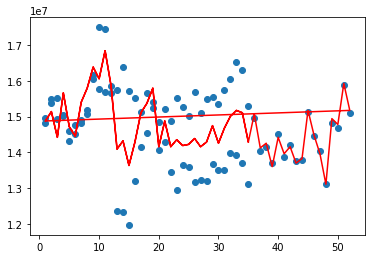

In [152]:
plt.scatter(X['Week_of_Year'], y)
plt.plot(X['Week_of_Year'], predictions, color='red')

In [153]:
### This graph and R2 shows that we can only predict the sales based on what week of the year with a 12 % accuracy. 

In [154]:
## Re Running for Makeup as it is the second largest to 

In [219]:
X = makeup_df['Makeup'].to_frame()

In [220]:
# Generate a column with the week of the year
X['Week_of_Year'] = X.index.weekofyear
X.head()

<ipython-input-220-0d8505e88685>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  X['Week_of_Year'] = X.index.weekofyear


,Makeup,Week_of_Year
2019-01-05,7156661,1
2019-01-12,7188663,2
2019-01-19,7173238,3
2019-01-26,6851425,4
2019-02-02,6745738,5


In [221]:
makeup_week=X.copy()

<AxesSubplot:xlabel='Week_of_Year', ylabel='Makeup'>

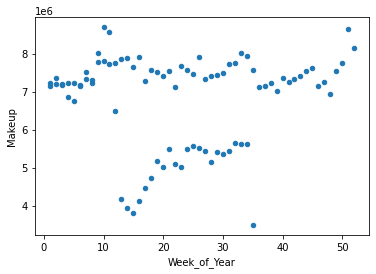

In [222]:
X.plot(x= "Week_of_Year", y="Makeup", kind="scatter")

In [223]:
X_binary_encoded = pd.get_dummies(X, columns=['Week_of_Year'])
X_binary_encoded = X_binary_encoded.drop('Makeup', axis=1)

In [162]:
y = makeup_df['Makeup'].copy()

In [163]:
# Create the Linear Regression model
model = LinearRegression()

# Fit the model to the data (Train the model)
model.fit(X_binary_encoded, y)

# Predict the sales using the week of the year as inputs
predictions = model.predict(X_binary_encoded)

In [164]:
from sklearn.metrics import mean_squared_error, r2_score

# The default scoring method is the R2 score
score = model.score(X_binary_encoded, y)
r2 = r2_score(y, predictions)

print(f"Score: {score}, r2: {r2}")

Score: 0.28147858064481623, r2: 0.28147858064481623


In [165]:
# Mean Squared Error
mse = mean_squared_error(y, predictions)
mse

1039189571641.3334

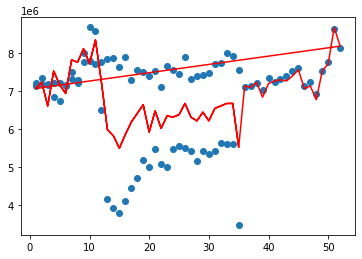

In [166]:
plt.scatter(X['Week_of_Year'], y)
plt.plot(X['Week_of_Year'], predictions, color='red')

In [ ]:
## Now trying Lotion data

In [226]:
X = lotion_df['Lotion'].to_frame()


In [227]:
# Generate a column with the week of the year
X['Week_of_Year'] = X.index.weekofyear
X.head()

<ipython-input-227-0d8505e88685>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  X['Week_of_Year'] = X.index.weekofyear


,Lotion,Week_of_Year
2019-01-05,3227827,1
2019-01-12,3551875,2
2019-01-19,3435812,3
2019-01-26,3406859,4
2019-02-02,3754491,5


<AxesSubplot:xlabel='Week_of_Year', ylabel='Lotion'>

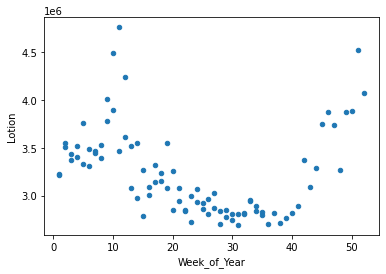

In [235]:
X.plot(x= "Week_of_Year", y="Lotion", kind="scatter")

In [236]:
# Binary encode the weekly column to use as new input features for the model
X_binary_encoded = pd.get_dummies(X, columns=['Week_of_Year'])
X_binary_encoded.head()

,Lotion,Week_of_Year_1,Week_of_Year_2,Week_of_Year_3,Week_of_Year_4,Week_of_Year_5,Week_of_Year_6,Week_of_Year_7,Week_of_Year_8,Week_of_Year_9,...,Week_of_Year_43,Week_of_Year_44,Week_of_Year_45,Week_of_Year_46,Week_of_Year_47,Week_of_Year_48,Week_of_Year_49,Week_of_Year_50,Week_of_Year_51,Week_of_Year_52
2019-01-05,3227827,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-12,3551875,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-19,3435812,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-26,3406859,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-02-02,3754491,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
# The Acne Sales column must be deleted from the input features
X_binary_encoded = X_binary_encoded.drop("Lotion", axis=1)


In [238]:
y = lotion_df['Lotion'].copy()

In [239]:
# Create the Linear Regression model
model = LinearRegression()

# Fit the model to the data (Train the model)
model.fit(X_binary_encoded, y)

# Predict the sales using the week of the year as inputs
predictions = model.predict(X_binary_encoded)

In [240]:
from sklearn.metrics import mean_squared_error, r2_score

# The default scoring method is the R2 score
score = model.score(X_binary_encoded, y)
r2 = r2_score(y, predictions)

print(f"Score: {score}, r2: {r2}")

Score: 0.8408367956279723, r2: 0.8408367956279723


In [241]:
# Mean Squared Error
mse = mean_squared_error(y, predictions)
mse

32796690513.770115

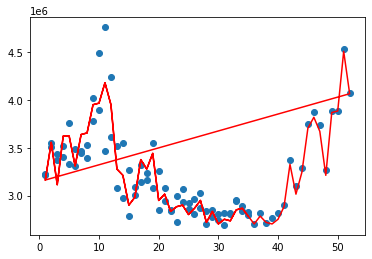

In [244]:
plt.scatter(X['Week_of_Year'], y)
plt.plot(X['Week_of_Year'], predictions, color='red')

In [ ]:
## The Lotion was the strongest model with 82% model fit for having the week predict the sales outcome

In [167]:
### Now trying to determine if promos effect sales using A/B Testing ###


In [168]:
### Code below implementeed from https://harvard-iacs.github.io/2018-CS109A/lectures/lecture-23/demo/ ###

In [169]:
# H(NULL)=The Promos have no effect on sales
# H1== Promos have an effect on sales price

In [170]:
## ACNE TEST

In [171]:
acne_df=acne_df.astype(int)
acne_df1=acne_df.dropna()

In [172]:
#creating the sales and promo measures for each group
controlgroup = acne_df1['Acne'][acne_df1['acne_promo']==0]
trt1group = acne_df1['Acne'][acne_df1['acne_promo']==1]


In [173]:

# The two-sample t-test is used to test whether the unknown means of two groups are equal or not.

In [174]:
#two sample t-test testing promo and non promo group
sp.stats.ttest_ind(controlgroup,trt1group)

Ttest_indResult(statistic=1.7895290850337586, pvalue=0.07709126658691197)

In [175]:
#ANOVA F-test
sp.stats.f_oneway(controlgroup,trt1group)

F_onewayResult(statistic=3.202414346181755, pvalue=0.07709126658691216)

In [176]:
## P <.05 so we reject the NULL Hyptohesis and conclude that promos are affecting sales performance. 

In [177]:
##insert graph here

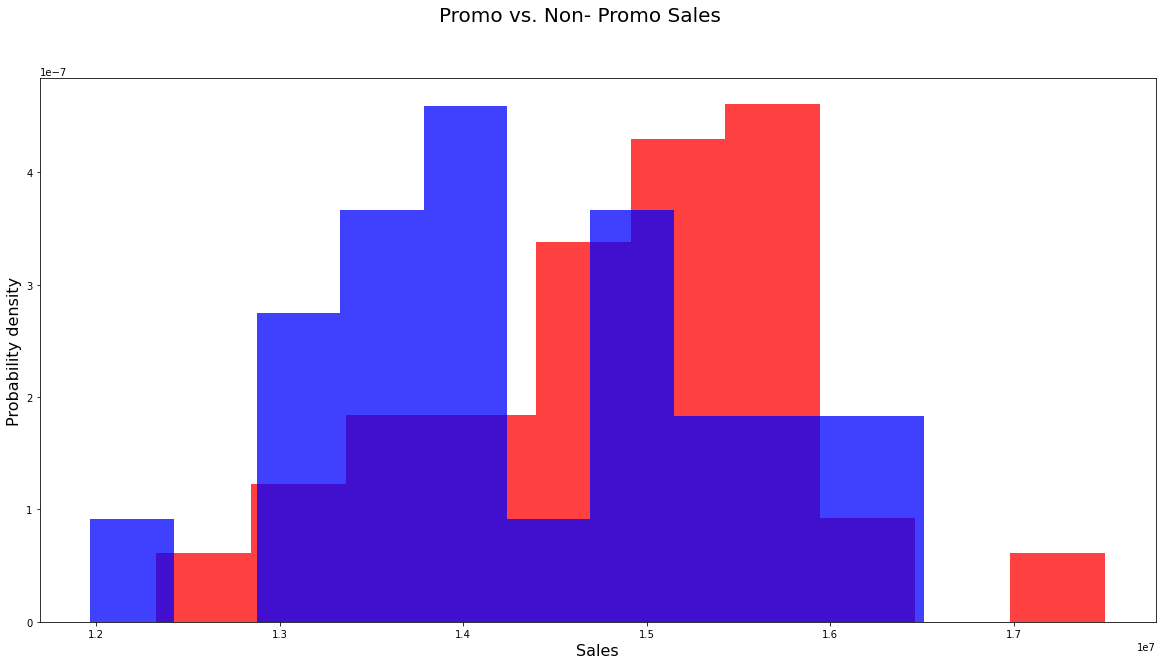

In [178]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)


p_bp_male = plt.hist(acne_df1['Acne'][acne_df1['acne_promo']==0], label= "Non-Promos",color="red",
                     density= True,
                     alpha=0.75)
p_bp_female = plt.hist(acne_df1['Acne'][acne_df1['acne_promo']==1], label= "Promos",color="blue",
                       density= True,
                       alpha=0.75)


plt.suptitle("Promo vs. Non- Promo Sales", fontsize= 20)
plt.xlabel("Sales", fontsize= 16)
plt.ylabel("Probability density", fontsize= 16)



plt.show()


In [254]:
##Using Makeup

In [255]:
#creating the sales and promo measures for each group
controlgroup = makeup_df['Makeup'][makeup_df['makeup_promo']==0]
trt1group = makeup_df['Makeup'][makeup_df['makeup_promo']==1]


In [256]:
#two sample t-test testing promo and non promo group
sp.stats.ttest_ind(controlgroup,trt1group)

Ttest_indResult(statistic=9.287425196321568, pvalue=1.4139045808058168e-14)

In [257]:
#ANOVA F-test
sp.stats.f_oneway(controlgroup,trt1group)

F_onewayResult(statistic=86.25626677726864, pvalue=1.413904580805835e-14)

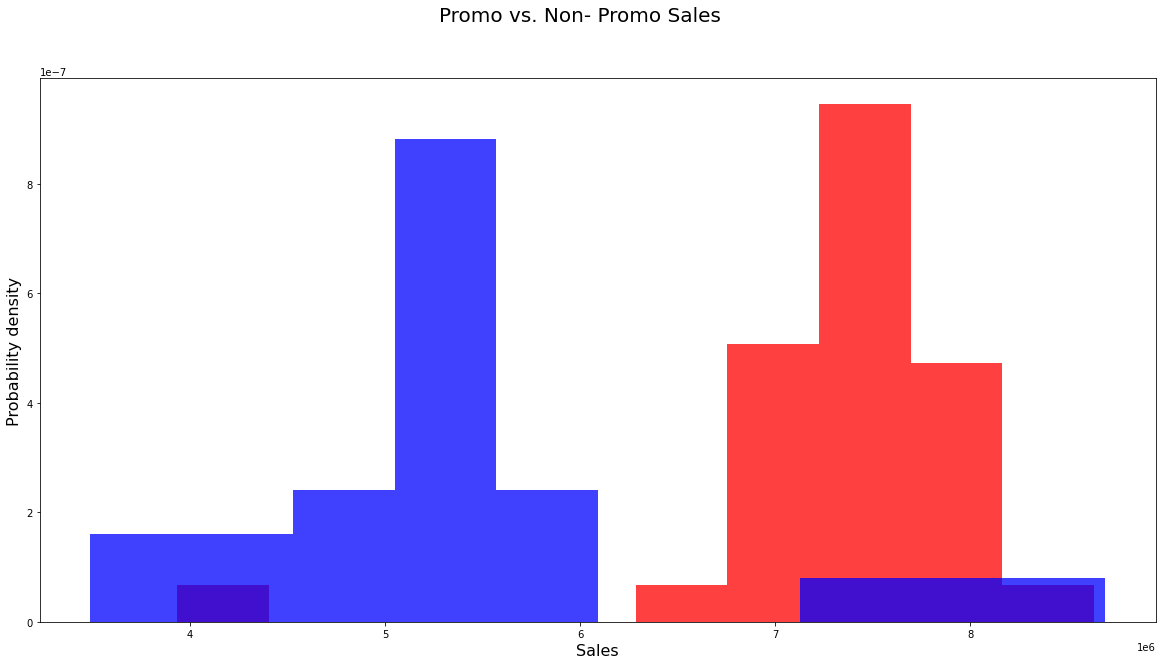

In [258]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)


p_bp_male = plt.hist(makeup_df['Makeup'][makeup_df['makeup_promo']==0], label= "Non-Promos",color="red",
                     density= True,
                     alpha=0.75)
p_bp_female = plt.hist(makeup_df['Makeup'][makeup_df['makeup_promo']==1], label= "Promos",color="blue",
                       density= True,
                       alpha=0.75)


plt.suptitle("Promo vs. Non- Promo Sales", fontsize= 20)
plt.xlabel("Sales", fontsize= 16)
plt.ylabel("Probability density", fontsize= 16)



plt.show()

In [ ]:
## Using Lotion

In [259]:
#creating the sales and promo measures for each group
controlgroup = lotion_df['Lotion'][lotion_df['lotion_promo']==0]
trt1group = lotion_df['Lotion'][lotion_df['lotion_promo']==1]


In [260]:
#two sample t-test testing promo and non promo group
sp.stats.ttest_ind(controlgroup,trt1group)

Ttest_indResult(statistic=-1.692361509021053, pvalue=0.09423981578713769)

In [261]:
#ANOVA F-test
sp.stats.f_oneway(controlgroup,trt1group)

F_onewayResult(statistic=2.8640874772160125, pvalue=0.0942398157871378)

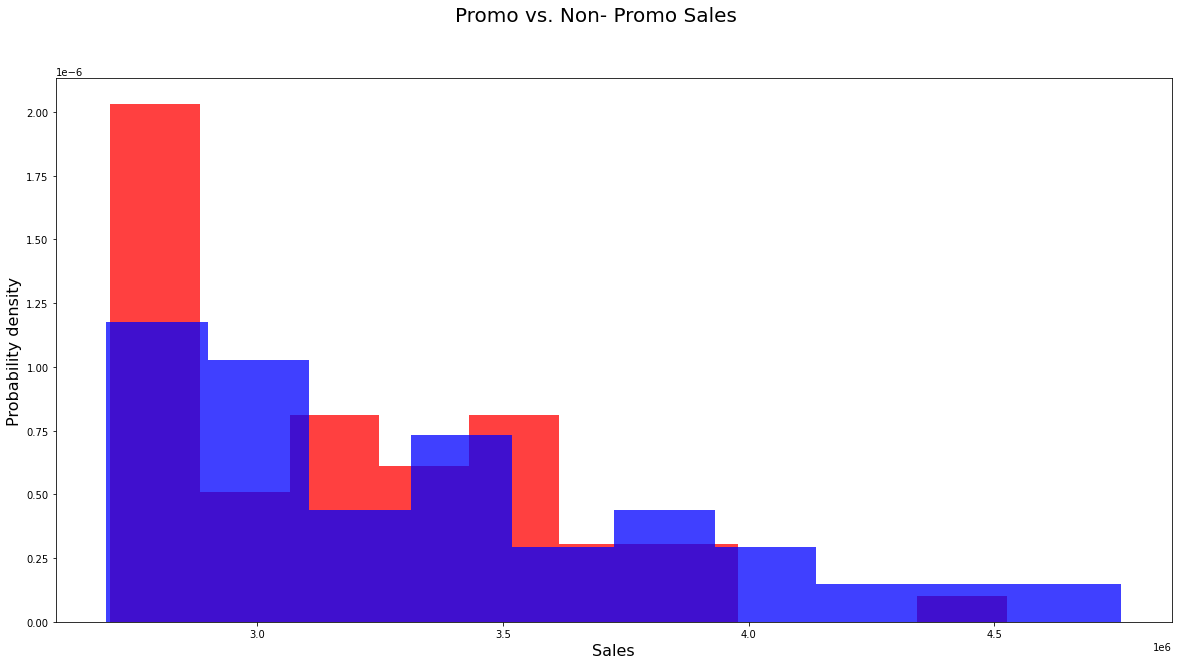

In [263]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)


p_bp_male = plt.hist(lotion_df['Lotion'][lotion_df['lotion_promo']==0], label= "Non-Promos",color="red",
                     density= True,
                     alpha=0.75)
p_bp_female = plt.hist(lotion_df['Lotion'][lotion_df['lotion_promo']==1], label= "Promos",color="blue",
                       density= True,
                       alpha=0.75)


plt.suptitle("Promo vs. Non- Promo Sales", fontsize= 20)
plt.xlabel("Sales", fontsize= 16)
plt.ylabel("Probability density", fontsize= 16)



plt.show()

In [179]:
## Running SVR PRediction on Acne Sales prices

In [290]:
acne_df

Date,Acne,Week
2019-01-05,14969813,1
2019-01-12,15488855,2
2019-01-19,15522357,3
2019-01-26,15054219,4
2019-02-02,14585357,5
...,...,...
2020-08-01,13517117,31
2020-08-08,13979460,32
2020-08-15,13920768,33
2020-08-22,13697476,34


In [291]:

X = acne_df.iloc[:,0].values     
y = acne_df.iloc[:,1].values        

In [292]:
# split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [293]:
X_train[:3]
# some features are big in scale, so adjust the scale

array([14157228, 14450238, 14853372])

In [294]:
 X_train= X_train.reshape(-1,1)
 y_train= y_train.reshape(-1,1)
 X_test = X_test.reshape(-1,1)

In [295]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [296]:
# PAY ATTENTION, WE ARE IMPORTING SVR, WHICH IS FOR REGRESSION
from sklearn.svm import SVR

In [297]:
regressor = SVR(kernel = 'rbf') # using rbf kernel
# also, we here call it a regressor, since it is a regression

# in SVC = support vector classification, many name it as a classifier

In [298]:
regressor.fit(X_train, y_train)

C:\Users\Dev\Anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [299]:
predictions = regressor.predict(X_test)

In [300]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

14.49798410132805

In [301]:
r2_score(y_test,predictions)

0.08783739709663885

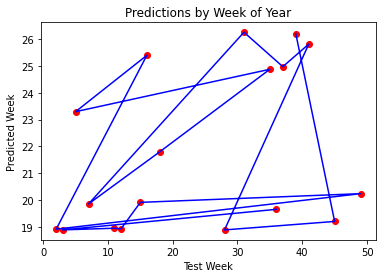

In [302]:
# Visualising the Regression results
plt.scatter(y_test, predictions, color = 'red')
plt.plot(y_test, predictions, color = 'blue')
plt.title('Predictions by Week of Year')
plt.xlabel('Test Week')
plt.ylabel('Predicted Week')
plt.show()

In [303]:
## Outsput shows that the model is only 8.2% accurate in prediction. 

In [ ]:
##Using Makeup

In [304]:
makeup_df.head()

Date,Makeup,makeup_promo
2019-01-05,7156661,0
2019-01-12,7188663,0
2019-01-19,7173238,0
2019-01-26,6851425,0
2019-02-02,6745738,0


In [305]:
makeup_df.drop(columns="makeup_promo")

Date,Makeup
2019-01-05,7156661
2019-01-12,7188663
2019-01-19,7173238
2019-01-26,6851425
2019-02-02,6745738
...,...
2020-08-01,5422756
2020-08-08,5647887
2020-08-15,5619787
2020-08-22,5622940


In [307]:
makeup_df['Week'] = makeup_df.index.weekofyear

<ipython-input-307-17e265cee42f>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  makeup_df['Week'] = makeup_df.index.weekofyear


In [308]:
makeup_df.head()

Date,Makeup,makeup_promo,Week
2019-01-05,7156661,0,1
2019-01-12,7188663,0,2
2019-01-19,7173238,0,3
2019-01-26,6851425,0,4
2019-02-02,6745738,0,5


In [309]:
makeup_df.drop(columns="makeup_promo")

Date,Makeup,Week
2019-01-05,7156661,1
2019-01-12,7188663,2
2019-01-19,7173238,3
2019-01-26,6851425,4
2019-02-02,6745738,5
...,...,...
2020-08-01,5422756,31
2020-08-08,5647887,32
2020-08-15,5619787,33
2020-08-22,5622940,34


In [310]:

X = makeup_df.iloc[:,0].values     
y = makeup_df.iloc[:,1].values        

In [311]:
# split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [312]:
X_train[:3]
# some features are big in scale, so adjust the scale

array([4468112, 7142890, 7418561])

In [314]:
X_train= X_train.reshape(-1,1)
y_train= y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [315]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [316]:
# PAY ATTENTION, WE ARE IMPORTING SVR, WHICH IS FOR REGRESSION
from sklearn.svm import SVR

In [317]:
regressor = SVR(kernel = 'rbf') # using rbf kernel
# also, we here call it a regressor, since it is a regression

# in SVC = support vector classification, many name it as a classifier

In [318]:
regressor.fit(X_train, y_train)

C:\Users\Dev\Anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [319]:
predictions = regressor.predict(X_test)

In [320]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

0.3878555257452755

In [321]:
r2_score(y_test,predictions)

0.25015479280352804

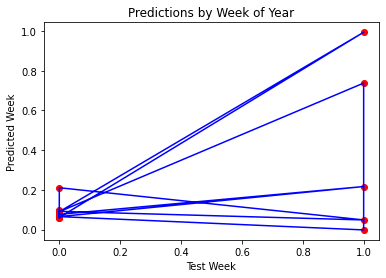

In [322]:
# Visualising the Regression results
plt.scatter(y_test, predictions, color = 'red')
plt.plot(y_test, predictions, color = 'blue')
plt.title('Predictions by Week of Year')
plt.xlabel('Test Week')
plt.ylabel('Predicted Week')
plt.show()

In [326]:
## Using Lotion

In [327]:
lotion_df['Week'] = makeup_df.index.weekofyear

<ipython-input-327-ddc723731459>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  lotion_df['Week'] = makeup_df.index.weekofyear


In [328]:
lotion_df.head()

Date,Lotion,lotion_promo,Week
2019-01-05,3227827,0,1
2019-01-12,3551875,0,2
2019-01-19,3435812,0,3
2019-01-26,3406859,0,4
2019-02-02,3754491,0,5


In [329]:
lotion_df.drop(columns="lotion_promo")

Date,Lotion,Week
2019-01-05,3227827,1
2019-01-12,3551875,2
2019-01-19,3435812,3
2019-01-26,3406859,4
2019-02-02,3754491,5
...,...,...
2020-08-01,2693439,31
2020-08-08,2804635,32
2020-08-15,2944624,33
2020-08-22,2894137,34


In [347]:
X = lotion_df.iloc[:,0].values     
y = lotion_df.iloc[:,1].values        

In [348]:
# split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [349]:
X_train[:3]

array([3323107, 3876170, 2853093])

In [350]:
X_train= X_train.reshape(-1,1)
y_train= y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [351]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [352]:
from sklearn.svm import SVR


In [353]:
regressor = SVR(kernel = 'rbf')

In [354]:
regressor.fit(X_train, y_train)

C:\Users\Dev\Anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [355]:
predictions = regressor.predict(X_test)

In [356]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

0.5666486009949899

In [357]:
r2_score(y_test,predictions)

-0.3004170798887962

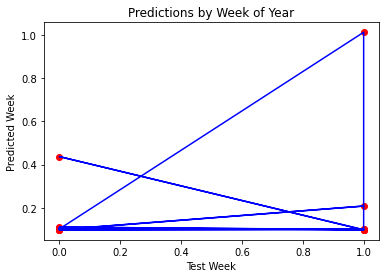

In [358]:
# Visualising the Regression results
plt.scatter(y_test, predictions, color = 'red')
plt.plot(y_test, predictions, color = 'blue')
plt.title('Predictions by Week of Year')
plt.xlabel('Test Week')
plt.ylabel('Predicted Week')
plt.show()

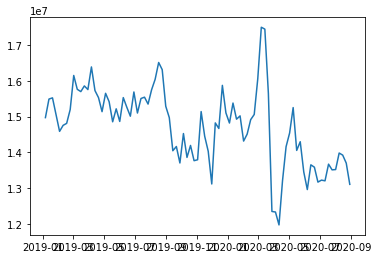

In [198]:
plt.plot(acne_df["Acne"])
plt.show()